# Inglewood 2010 Parcel Analysis 

For this assignment, I use the LA County Assessors Parcel Data to look at the city of Inglewood. 
In terms of our project - which explores the impact of major stadium developments on the surrounding community, we will be using the 2010 data and compare it to the 2020 data. 

First - we begin by importing the libraries we will be using as well as uploading the data we want to explore. 

In [41]:
import pandas as pd

In [42]:
import geopandas as gpd

In [43]:
import contextily as ctx

In [44]:
import matplotlib.pyplot as plt

In [45]:
import networkx as nx 

In [46]:
import osmnx as ox 

In [47]:
iwood = pd.read_csv ('Data/Inglewood Data 2010 Assessors DATA PORTAL  .csv')

I just imported the data I have from the Data folder to use for this analysis.

In [48]:
address = 'Inglewood, Los Angeles, CA'

I will be mapping the data using OSMnx - so I bring focus to the city of analysis: Inglewood.

In [49]:
%%time
osm = ox.geometries_from_address(address,tags={'building':True},dist=1000)

CPU times: user 1.07 s, sys: 41.3 ms, total: 1.11 s
Wall time: 1.13 s


I think this just told me how fast it processed my data?

In [50]:
osm.shape

(3630, 50)

This is what my data looks like: quantity of rows and columns.

In [51]:
type(osm)

geopandas.geodataframe.GeoDataFrame

This is the type of data. 

In [52]:
osm.sample(10)

addr:state     building   ele gnis:county_name  \
element_type osmid                                                      
way          412179444        NaN        house  62.9              NaN   
             412179167        NaN        house  65.2              NaN   
             442360252        NaN   apartments  52.1              NaN   
             440889750        NaN        house  77.5              NaN   
             412179309        NaN        house  65.0              NaN   
             440804539        NaN  residential  55.9              NaN   
             441447818        NaN        house  54.2              NaN   
             412179741        NaN        house  60.4              NaN   
             412179875        NaN   apartments  63.7              NaN   
             440821224        NaN        house  53.9              NaN   

                       gnis:feature_id gnis:import_uuid gnis:reviewed name  \
element_type osmid                                                           
way          412179444             NaN              NaN           NaN  NaN   
             412179167             NaN              NaN           NaN  NaN   
             442360252             NaN              NaN           NaN  NaN   
             440889750             NaN              NaN           NaN  NaN   
             412179309             NaN              NaN           NaN  NaN   
             440804539             NaN              NaN           NaN  NaN   
             441447818             NaN              NaN           NaN  NaN   
             412179741             NaN              NaN           NaN  NaN   
             412179875             NaN              NaN           NaN  NaN   
             440821224             NaN              NaN           NaN  NaN   

                       source  \
element_type osmid              
way          412179444    NaN   
             412179167    NaN   
             442360252    NaN   
             440889750    NaN   
             412179309    NaN   
             440804539    NaN   
             441447818    NaN   
             412179741    NaN   
             412179875    NaN   
             440821224    NaN   

                                                                 geometry  \
element_type osmid                                                          
way          412179444  POLYGON ((-118.32986 33.97218, -118.32987 33.9...   
             412179167  POLYGON ((-118.33210 33.97255, -118.33206 33.9...   
             442360252  POLYGON ((-118.34530 33.95797, -118.34531 33.9...   
             440889750  POLYGON ((-118.33460 33.96401, -118.33460 33.9...   
             412179309  POLYGON ((-118.33185 33.97137, -118.33185 33.9...   
             440804539  POLYGON ((-118.34512 33.97359, -118.34519 33.9...   
             441447818  POLYGON ((-118.33653 33.95736, -118.33653 33.9...   
             412179741  POLYGON ((-118.32930 33.97314, -118.32925 33.9...   
             412179875  POLYGON ((-118.32992 33.97377, -118.33004 33.9...   
             440821224  POLYGON ((-118.34950 33.96698, -118.34960 33.9...   

                        ... building:units office tomb fixme layer  \
element_type osmid      ...                                          
way          412179444  ...              1    NaN  NaN   NaN   NaN   
             412179167  ...              1    NaN  NaN   NaN   NaN   
             442360252  ...              6    NaN  NaN   NaN   NaN   
             440889750  ...              1    NaN  NaN   NaN   NaN   
             412179309  ...              1    NaN  NaN   NaN   NaN   
             440804539  ...              2    NaN  NaN   NaN   NaN   
             441447818  ...              1    NaN  NaN   NaN   NaN   
             412179741  ...              1    NaN  NaN   NaN   NaN   
             412179875  ...              8    NaN  NaN   NaN   NaN   
             440821224  ...              1    NaN  NaN   NaN   NaN   

                       social_facility tourism

This is a sample of 10 rows within my data. 

While I explore my data - I decide I only want to look at the types of buildings in Inglewood for this analysis following the additional lab from week 4 as suggested by Prof. Yoh.

In [53]:
osm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 3630 entries, ('node', 368167028) to ('relation', 6598695)
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   addr:state        3 non-null      object  
 1   building          3630 non-null   object  
 2   ele               3433 non-null   object  
 3   gnis:county_name  2 non-null      object  
 4   gnis:feature_id   5 non-null      object  
 5   gnis:import_uuid  2 non-null      object  
 6   gnis:reviewed     2 non-null      object  
 7   name              9 non-null      object  
 8   source            2 non-null      object  
 9   geometry          3630 non-null   geometry
 10  nodes             3629 non-null   object  
 11  addr:city         4 non-null      object  
 12  addr:housenumber  6 non-null      object  
 13  addr:postcode     5 non-null      object  
 14  addr:street       7 non-null      object  
 15  alt_name          1 non-null 

I want to first get a sense of the data that I have from my column titles. I now have an idea of the type of data within each column. 
But I have an idea of what I really want to use for this particular analysis now. 

In [54]:
columns_to_keep = ['geometry','building']
osm = osm[columns_to_keep]
osm.sample(10)

geometry  \
element_type osmid                                                          
way          443405519  POLYGON ((-118.34750 33.96180, -118.34762 33.9...   
             976251357  POLYGON ((-118.34562 33.96654, -118.34562 33.9...   
             440889776  POLYGON ((-118.32970 33.96431, -118.32970 33.9...   
             442359949  POLYGON ((-118.34445 33.96106, -118.34453 33.9...   
             440804682  POLYGON ((-118.34497 33.97355, -118.34496 33.9...   
             411788351  POLYGON ((-118.33524 33.96423, -118.33523 33.9...   
             440889635  POLYGON ((-118.33135 33.96492, -118.33142 33.9...   
             411789389  POLYGON ((-118.33339 33.96829, -118.33332 33.9...   
             411789702  POLYGON ((-118.33799 33.96767, -118.33800 33.9...   
             442359548  POLYGON ((-118.35068 33.95717, -118.35060 33.9...   

                           building  
element_type osmid                   
way          443405519        house  
             976251357          yes  
             440889776        house  
             442359949  residential  
             440804682  residential  
             411788351        house  
             440889635  residential  
             411789389        house  
             411789702          yes  
             442359548   apartments

Playing it cool and keeping it simple - for the sake of this lab, we keep a very limited amount of columns that we thinkg we can benefit from. 

# 'Lets make a building type chart'

In [55]:
osm_building_counts = osm.building.value_counts()
osm_building_counts

house           2217
apartments       432
residential      380
yes              350
retail            71
commercial        60
garages           51
garage            26
industrial        15
school            12
hotel              6
hospital           4
factory            3
warehouse          1
church             1
kindergarten       1
Name: building, dtype: int64

This code provided me with general information on the amount of each type of building within my data set. 

In [56]:
type(osm_building_counts)

pandas.core.series.Series

The data being provided right now by the system is not really malleable though - we need to split the table up into rows and columns
to be able to identify and select/filter what it is we want to work with. We will do this by creating a data frame for the building types.

In [57]:
df_osm_building_types = pd.DataFrame(osm_building_counts)
df_osm_building_types

,building
house,2217
apartments,432
residential,380
yes,350
retail,71
commercial,60
garages,51
garage,26
industrial,15
school,12


The data frame created apparently has the type of building as the index. We want to make sure to reset it. 

In [58]:
df_osm_building_types = df_osm_building_types.reset_index()
df_osm_building_types

,index,building
0,house,2217
1,apartments,432
2,residential,380
3,yes,350
4,retail,71
5,commercial,60
6,garages,51
7,garage,26
8,industrial,15
9,school,12


Our index is now reset - lets now rename our columns so we are able to better identify the data we are working with. 

In [59]:
df_osm_building_types.columns = ['building_type','count']
df_osm_building_types

,building_type,count
0,house,2217
1,apartments,432
2,residential,380
3,yes,350
4,retail,71
5,commercial,60
6,garages,51
7,garage,26
8,industrial,15
9,school,12


# Creating a Horizontal Bar Chart 

<AxesSubplot:>

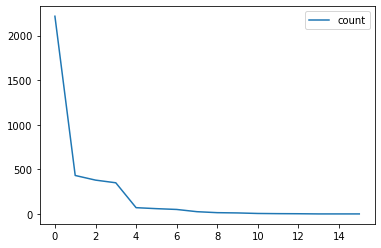

In [60]:
df_osm_building_types.plot()

The horizontal bar chart created shows the frequency of the unit type within our data on the form of a line graph. The unit type is defined by the x-axis using the
freshly noted index and the y-axis tells us the frequency, which is the value from the count columnn.

<AxesSubplot:ylabel='building_type'>

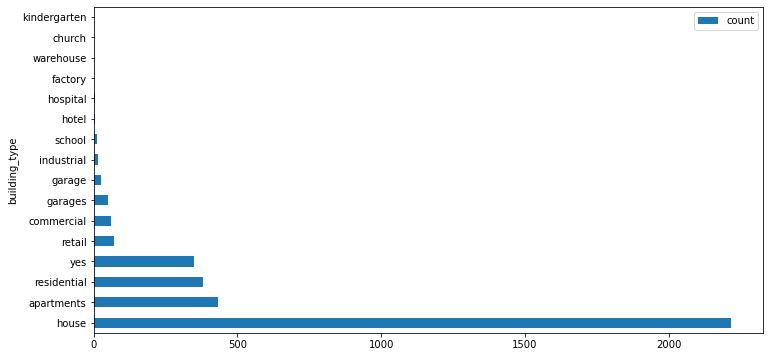

In [61]:
df_osm_building_types.plot.barh(figsize=(12,6),
                                x='building_type')

We can also display our data using bar graphs, as has been reproduced in this manner with the type of unit on the y-axis and the frequency on the x-axis.

In [62]:
df_osm_building_types = df_osm_building_types.sort_values(by='count', ascending=True)
df_osm_building_types

,building_type,count
13,warehouse,1
14,church,1
15,kindergarten,1
12,factory,3
11,hospital,4
10,hotel,6
9,school,12
8,industrial,15
7,garage,26
6,garages,51


<AxesSubplot:title={'center':'Top 10 building types in Inglewood, Los Angeles, CA'}, ylabel='building_type'>

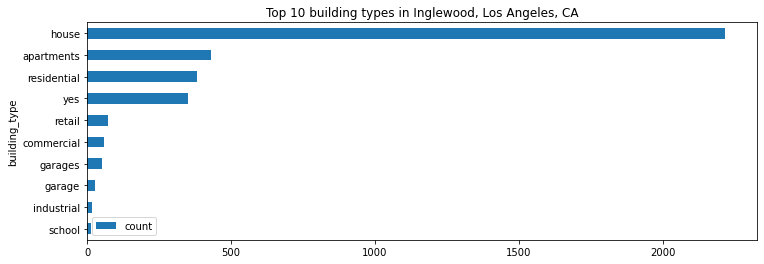

In [63]:
df_osm_building_types[-10:].plot.barh(figsize=(12,4),
                                      x='building_type',
                                      y='count',
                                      title="Top 10 building types in "+address)

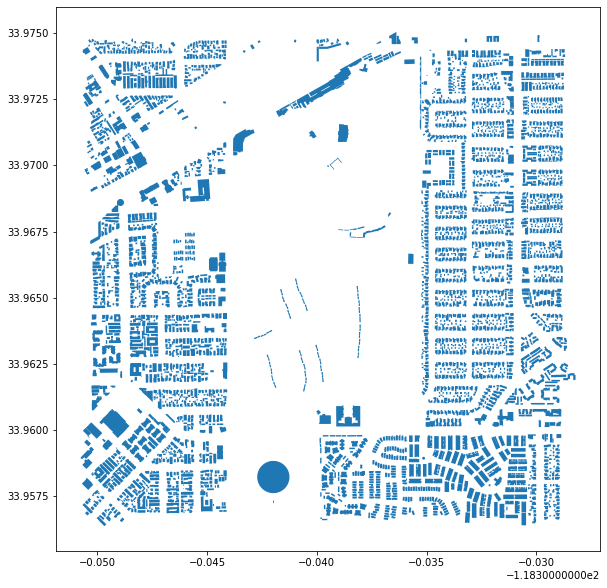

In [64]:
ax = osm.plot(figsize=(10,10))

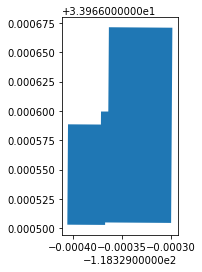

In [65]:
ax = osm.sample(1).plot()

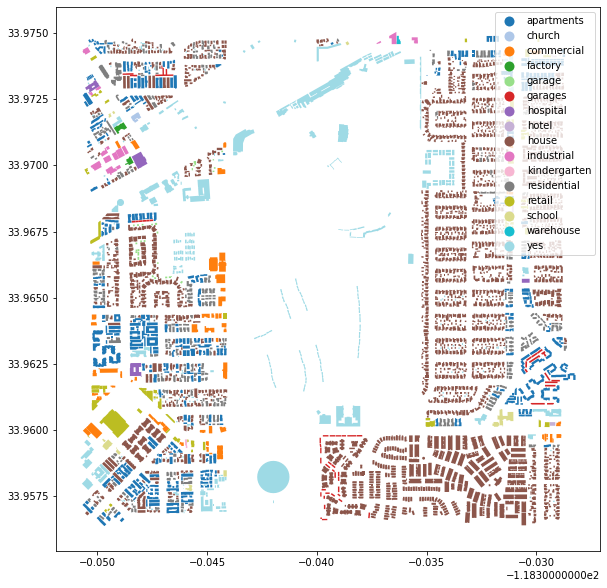

In [66]:
ax = osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

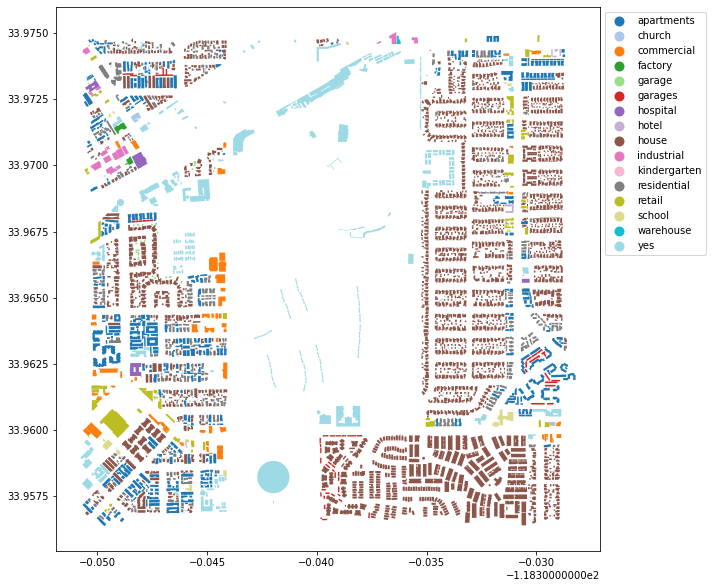

In [67]:
ax = osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

In [68]:
ax.set_title('Building types in ' + address)


Text(0.5, 1.0, 'Building types in Inglewood, Los Angeles, CA')

In [69]:
ax.axis('off')

(-118.351897885, -118.327082215, 33.955437395, 33.975981105)

(-118.351897885, -118.327082215, 33.955437395, 33.975981105)

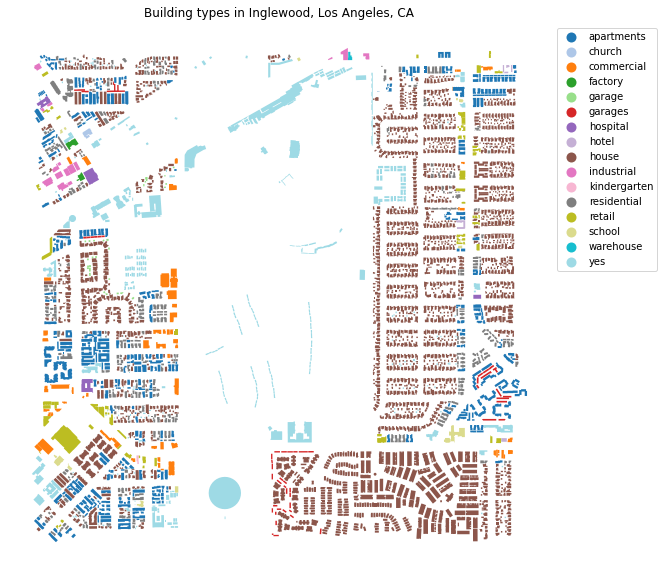

In [70]:
ax = osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})


ax.set_title('Building types in ' + address)

ax.axis('off')

In [71]:
osm_web_mercator = osm.to_crs(epsg=3857)

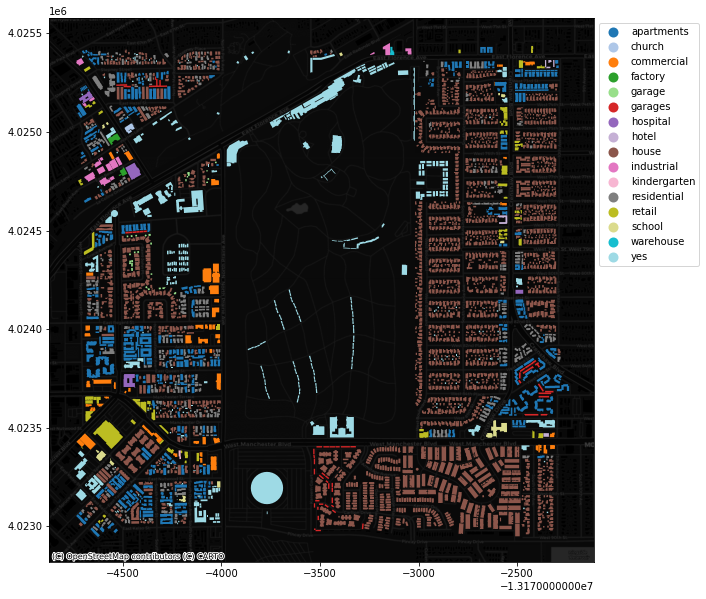

In [72]:
ax = osm_web_mercator.plot(figsize=(10,10),
                            column='building',
                            cmap='tab20',
                            legend=True,
                            legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

In [73]:
def your_name():    
    print('My name is Luis')

In [74]:
your_name()

My name is Luis


In [75]:
def your_name(name):
    print('My name is ' + name)

In [76]:
your_name('Luis')

My name is Luis
